In [160]:
import scipy.io
import torch
import importlib
import matplotlib.pyplot as plt
import numpy as np

In [161]:
import src.HyperParameters as hp 
import src.data as dt 
import src.model as Model 
import src.train as trainer

importlib.reload(hp)
importlib.reload(dt)
importlib.reload(Model)
importlib.reload(trainer)

<module 'src.train' from '/Users/ramtarun/Desktop/Cambridge/Friction-Factor-Estimation-PINN/src/train.py'>

In [162]:
data = scipy.io.loadmat('/Users/ramtarun/Desktop/Cambridge/Indirect-Noise-in-Nozzles/Data/Data_PINN_subsonic_geom_linvelsup_f0-0.1.mat')

In [163]:
PINN_model = Model.PINN()

In [164]:
params = list(PINN_model.parameters())
# optimizer = torch.optim.Adam([{'params' : params[1::]},{'params' : params[-1], 'lr': hp.ff_learning_rate}], lr = hp.learning_rate, amsgrad = True)   
optimizer = torch.optim.Adam(params=params, lr = hp.learning_rate, amsgrad = True)   
# optimizer = torch.optim.LBFGS(params, hp.ff_learning_rate, 
#                               max_iter = hp.epochs, 
#                               max_eval = None, 
#                               tolerance_grad = 1e-11, 
#                               tolerance_change = 1e-11, 
#                               history_size = 100, 
#                               line_search_fn = 'strong_wolfe')


Epoch 750/7500 - Train Loss: 0.001055 Val Loss: 0.058959 f_train: 0.0746 f_test: 0.0746
Epoch 1500/7500 - Train Loss: 0.001047 Val Loss: 0.062147 f_train: 0.0707 f_test: 0.0707
Epoch 2250/7500 - Train Loss: 0.001033 Val Loss: 0.054435 f_train: 0.0730 f_test: 0.0730
Epoch 3000/7500 - Train Loss: 0.001039 Val Loss: 0.055143 f_train: 0.0635 f_test: 0.0635
Epoch 3750/7500 - Train Loss: 0.001057 Val Loss: 0.054890 f_train: 0.0676 f_test: 0.0676
Epoch 4500/7500 - Train Loss: 0.001027 Val Loss: 0.055537 f_train: 0.0667 f_test: 0.0667
Epoch 5250/7500 - Train Loss: 0.001039 Val Loss: 0.054820 f_train: 0.0693 f_test: 0.0693
Epoch 6000/7500 - Train Loss: 0.001059 Val Loss: 0.054960 f_train: 0.0707 f_test: 0.0707
Epoch 6750/7500 - Train Loss: 0.001078 Val Loss: 0.054687 f_train: 0.0641 f_test: 0.0641
Epoch 7500/7500 - Train Loss: 0.001040 Val Loss: 0.054998 f_train: 0.0710 f_test: 0.0710


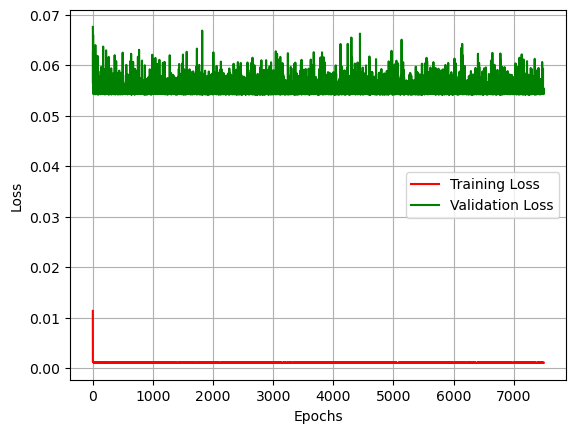

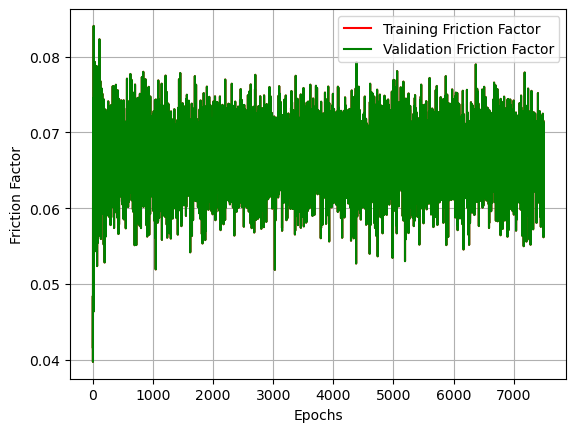

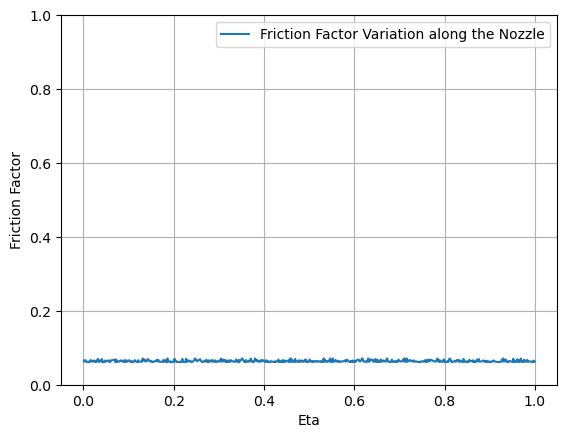

In [165]:
fval = [0.1  , 0.06 , 0.04, 0.01]

# for f in fval:
inputs, targets, meanflow =  dt.DataPreprocessing(data, ff=0.01)
train_loader, val_loader = dt.DataTransformer(inputs, targets, meanflow, TrainingSet=True)
train_loss, val_loss, f_train, f_test, f_dist = trainer.train(train_loader, val_loader, hp.epochs, optimizer, PINN_model)
with torch.no_grad():
    plt.figure() 
    plt.plot(train_loss.keys(), train_loss.values(), 'r-', label='Training Loss')
    plt.plot(val_loss.keys(), val_loss.values(), 'g-', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()
    plt.figure()
    plt.plot(f_train.keys(), f_train.values(), 'r-', label='Training Friction Factor')
    plt.plot(f_test.keys(), f_test.values(), 'g-', label='Validation Friction Factor')
    plt.xlabel('Epochs')
    plt.ylabel('Friction Factor')
    plt.legend()
    plt.grid()
    plt.show()
    plt.figure()
    ff_distribution = {}
    for key_tensor, value_tensor in f_dist.items():
    # Convert the tensors to numpy arrays
        key_array = np.array(key_tensor.detach())
        value_array = np.array(value_tensor.detach())
        # Unpack the elements from the tensors
        for key_elem, value_elem in zip(key_array, value_array):
        # Add the unpacked elements to the new dictionary
            ff_distribution[key_elem] = value_elem
        
        
ff_distribution = dict(sorted(ff_distribution.items()))
plt.plot(ff_distribution.keys(), ff_distribution.values(), label='Friction Factor Variation along the Nozzle')
plt.ylabel('Friction Factor')
plt.xlabel('Eta')
plt.ylim([0,1]) 
plt.legend()
plt.grid()
plt.show()


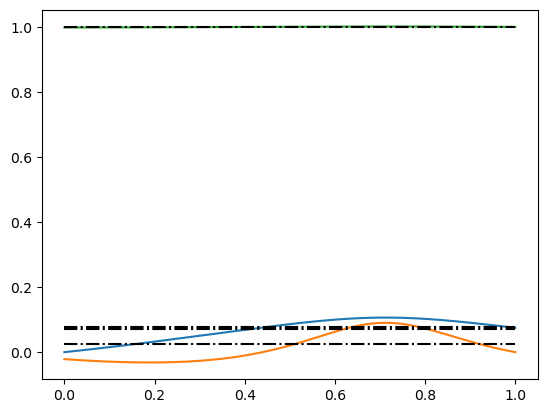

: 

In [166]:
plt.figure()
plt.plot(inputs[:,1], targets)
plt.plot(inputs[:,1],PINN_model.dnn(inputs).detach(), 'k-.')
